# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import pathlib

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1990 et se termine avec une semaine récente.

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

Pour plus de pérennité, les données brutes téléchargées sont gardées sur le dépôt afin de pouvoir les réutiliser sans avoir à les télécharger à chaque fois. Cela nécessite de ne les télécharger et les ajouter au dépôt si elles n'existent pas déjà dessus.

In [3]:
cached_file = "cached_raw_data.csv"
if pathlib.Path(cached_file).is_file():
    raw_data = pd.read_csv(cached_file)
else:
    raw_data = pd.read_csv(data_url, skiprows=1)
    raw_data.to_csv(cached_file)

Le jeu de données est complet, il n'y a pas de points manquants.

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Unnamed: 0, week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [5]:
data = raw_data.copy()
data

Unnamed: 0    week  indicator    inc  inc_low  inc_up  inc100  \
0              0  202027          7   1483      221    2745       2   
1              1  202026          7    707        0    1481       1   
2              2  202025          7    228        0     597       0   
3              3  202024          7    388        0     959       1   
4              4  202023          7    558        1    1115       1   
5              5  202022          7    277        0     633       0   
6              6  202021          7    602       36    1168       1   
7              7  202020          7    824       20    1628       1   
8              8  202019          7    310        0     753       0   
9              9  202018          7    849       98    1600       1   
10            10  202017          7    272        0     658       0   
11            11  202016          7    758       78    1438       1   
12            12  202015          7   1918      675    3161       3   
13            13  202014          7   3879     2227    5531       6   
14            14  202013          7   7326     5236    9416      11   
15            15  202012          7   8123     5790   10456      12   
16            16  202011          7  10198     7568   12828      15   
17            17  202010          7   9011     6691   11331      14   
18            18  202009          7  13631    10544   16718      21   
19            19  202008          7  10424     7708   13140      16   
20            20  202007          7   8959     6574   11344      14   
21            21  202006          7   9264     6925   11603      14   
22            22  202005          7   8505     6314   10696      13   
23            23  202004          7   7991     5831   10151      12   
24            24  202003          7   5968     4100    7836       9   
25            25  202002          7   6534     4530    8538      10   
26            26  202001          7   9835     7019   12651      15   
27            27  201952          7   7941     5246   10636      12   
28            28  201951          7   5823     3675    7971       9   
29            29  201950          7   6424     4276    8572      10   
...          ...     ...        ...    ...      ...     ...     ...   
1514        1514  199126          7  17608    11304   23912      31   
1515        1515  199125          7  16169    10700   21638      28   
1516        1516  199124          7  16171    10071   22271      28   
1517        1517  199123          7  11947     7671   16223      21   
1518        1518  199122          7  15452     9953   20951      27   
1519        1519  199121          7  14903     8975   20831      26   
1520        1520  199120          7  19053    12742   25364      34   
1521        1521  199119          7  16739    11246   22232      29   
1522        1522  199118          7  21385    13882   28888      38   
1523        1523  199117          7  13462     8877   18047      24   
1524        1524  199116          7  14857    10068   19646      26   
1525        1525  199115          7  13975     9781   18169      25   
1526        1526  199114          7  12265     7684   16846      22   
1527        1527  199113          7   9567     6041   13093      17   
1528        1528  199112          7  10864     7331   14397      19   
1529        1529  199111          7  15574    11184   19964      27   
1530        1530  199110          7  16643    11372   21914      29   
1531        1531  199109          7  13741     8780   18702      24   
1532        1532  199108          7  13289     8813   17765      23   
1533        1533  199107          7  12337     8077   16597      22   
1534        1534  199106          7  10877     7013   14741      19   
1535        1535  199105          7  10442     6544   14340      18   
1536        1536  199104          7   7913     4563   11263      14   
1537        1537  199103          7  15387    10484   20290      27   
1538        1538  199102      

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [6]:
def convert_week(year_and_week):
    year = year_and_week // 100
    week = year_and_week % 100
    return pd.Period(isoweek.Week(year, week).day(0), 'W')

data['period'] = list(map(convert_week, data['week']))

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [7]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

In [8]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

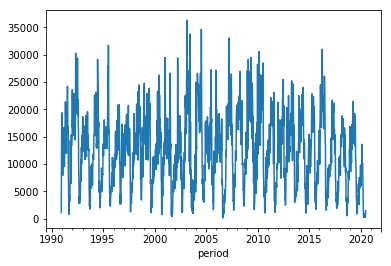

In [9]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics au printemps. Le creux des incidences se trouve en automne.

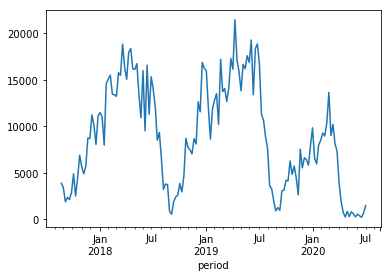

In [10]:
sorted_data['inc'][-150:].plot()

## Etude de l'incidence annuelle

Pour des réunions techniques liées à la validation automatiques des résultats du MOOC,nous définissons la période de référence entre deux minima de l'incidence, du $1^{er}$ septembre de l'année $N$ au $1^{er}$ septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence: à la place du $1^{er}$ septembre de chaque année, nous utilisons le premier jour de la semaine qui contient le $1^{er}$ septembre.

Comme l'incidence de syndrome grippal est très faible en été, cette modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an decembre 1990, ce qui rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [11]:
starting_year = 1991
first_septembre_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                        for y in range(starting_year,
                                       sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [12]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_septembre_week[:-1],
                        first_septembre_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

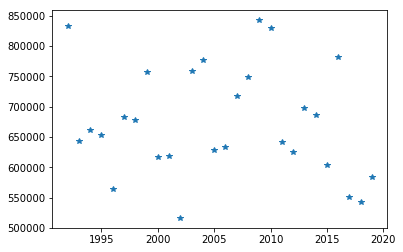

In [13]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [14]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Enfin, un histogramme montre que les épidémies les plus fortes ne touchent qu'environ 1% de la population et sont deux fois moins fréquente que les épidémies les plus fréquente.

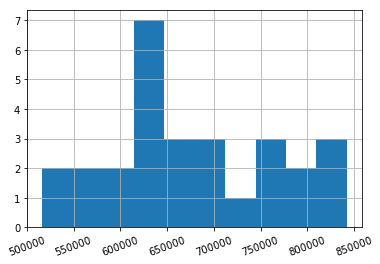

In [15]:
yearly_incidence.hist(xrot=20)